#### Name: Tanubrata Dey (td2201)
#### Homework 3: Dimentional Reduction

# Homework for Dimensionality Reduction

In this homework, we will continue to use the MNIST dataset.

In **Part 0** we will download a portion of the MNIST data and reshape the 2-dimensional images into 1-dimensional arrays. 

In **Part 1** (20 points) you will code your own implementation of PCA! You may only use functions from the Numpy library. You may NOT use any prebuilt PCA functions available in scikit-learn, prcomp, scipy or any other library. Doing so will result in a **0 score** for Part 1. If in doubt, feel free to clarify what library is allowed (and what is not) via Slack. 

In **Part 2** (80 points) you will explore the effectiveness of PCA, and compare its robustness with other techniques. For this section, you may either use the version implemented by scikit-learn, or the PCA class you coded in Part 1.

# **Part 0**

In [178]:
from tensorflow.keras.datasets import mnist
_ , (dat, lab) = mnist.load_data()  # use the first 1000 images in the test set of MNIST

In [179]:
dat.shape

(10000, 28, 28)

In [180]:
dat = dat[0:1000,:,:].reshape((1000, 28*28))  # flatten the image for the convenient of downstream analysis
lab = lab[0:1000]

In [181]:
print(f'Data dimension: {dat.shape}')
print(f'First 10 labels: {lab[0:10]}')

Data dimension: (1000, 784)
First 10 labels: [7 2 1 0 4 1 4 9 5 9]


In [182]:
lab.shape

(1000,)

# **Part 1** 
Choose between **Python** and **R** version.

##### **Part 1 - Python**

In [8]:
import numpy as np
import scipy.linalg as la
### YOU MAY ONLY USE FUNCTIONS FROM THE NUMPY LIBRARY ###
### Do NOT use scikit-learn
dat_copy = dat.copy()
class PCA_implementation:
  def __init__(self):
    self.X_centered = None
    self.values = None
    self.vectors = None

  def fit(self,X):
    # 1) center features (2 points)
    self.X_centered = X-X.mean() ### Replace "None" with your code 

    # 2) calculate covariance matrix (3 points)
    X_cov = np.cov(self.X_centered, rowvar=False) ### Replace "None" with your code 

    # 3) calculate eigen values/vectors (5 points)
    self.values,self.vectors = la.eig(X_cov) ### Replace "None" with your code 

    # 4) sort results such that your eigenvalues are descending (2 points)
    index = np.argsort(self.values)[::-1]
    self.values = self.values[index] ### Replace "None" with your code
    self.vectors = self.vectors[:,index] ### Replace "None" with your code

  def transform(self,n_components):
    # 5) rotate matrix with n_components (5 points)
    return np.dot(self.X_centered, self.vectors[:,0:n_components]) ### Replace "None" with your code 

True
1.8041124150158794e-16


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


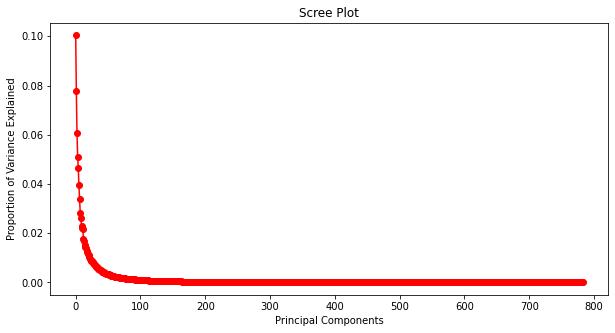

In [9]:
## Now let's test your finished PCA object!

#Instantiate your PCA class
pca = PCA_implementation()
#Fit the data, i.e. identify the eigen values and vectors 
pca.fit(dat)
#Transform the data, i.e. use the previously identified eigen values/vectors to transform original data with X number of components
output = pca.transform(n_components=50)

#How will does your implementation differ from Scikit-learn's implementation?
##Test code with sklearn's implementation of PCA
from sklearn.decomposition import PCA
pca_sklearn = PCA() 
pcs = pca_sklearn.fit_transform(dat)

#The difference in the first component's explained variance percentage should be small!
print(abs(pca.values[0]/pca.values.sum()-pca_sklearn.explained_variance_ratio_[0]) < 0.01) #Should be close to 0. In our test, achieved 1.94e-16
print(abs(pca.values[0]/pca.values.sum()-pca_sklearn.explained_variance_ratio_[0]))

#Generate a scree plot using your PCA implementation
### FILL WITH YOUR CODE (3 points)
import matplotlib.pyplot as plt
variance_percentage = pca.values/pca.values.sum()
no_components=np.arange(len(pca.values))
proportion_variance=variance_percentage
plt.figure(figsize=(10, 5))
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Variance Explained")
plt.plot(no_components, proportion_variance, "ro-")
plt.show()

##### **Part 1 - R**

In [ ]:
%%R
## Do not use any library for which PCA is already implemented. 

fit <- function(X){
    # 1) Center features to mean 0 (2 points)
    X_centered = None ### Replace "None" with your code 

    # 2) Calculate covariance of matrix (3 points)
    X_cov = None ### Replace "None" with your code

    # 3) Calculate eigen values/vectors and sort in descending order of explained variance (5 points)
    values,vectors = None ### Replace "None" with your code

    # 4) sort results such that your eigenvalues are descending (2 points)
    values = None ### Replace "None" with your code
    vectors = None ### Replace "None" with your code

    return list(values,vectors)
}

transform <- function(X,n_components,vectors){
    # 5) rotate matrix with n_components (5 points)
    return None ### Replace "None" with your code 
}


pca_fit = fit(dat)
pca_transform = transform(X=dat,n_components=50,vectors=pca_fit[2])


#Generate a scree plot using your PCA implementation
### FILL WITH YOUR CODE (3 points)

# **Part 2**

You may now use scikit-learn's implementation of PCA!

1. Run PCA on the whole dataset (n=1000) and generate the scree plot. How do the results differ from your scree plot in Part 1? (15 points, Comparative accuracy not graded for in Part 2) 

In [10]:
from sklearn.decomposition import PCA
pca_sklearn = PCA() 
pcs = pca_sklearn.fit_transform(dat)

In [11]:
pcs.shape

(1000, 784)

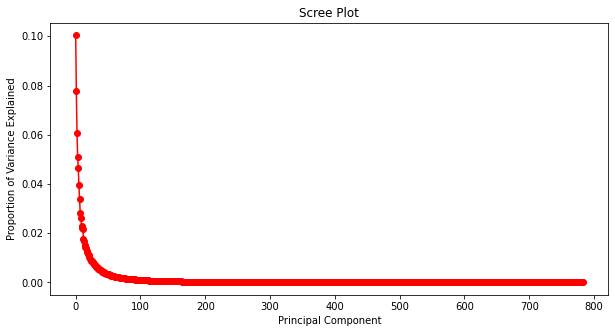

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.plot(pca_sklearn.explained_variance_ratio_, "ro-")
plt.show()

The scree plot from part 1 looks same to the one in part 2, that means our implementation of PCA in part 1 worked succesfully when compared with sklearn in part 2.

2. Represent all data points on a two-dimensional scatter plot using their first two principal component scores. Distinguish the points by color or symbol style according to their true label. Do examples of different digits appear to be well seperated? (10 points)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
pca_sklearn = PCA() 
pcs = pca_sklearn.fit_transform(dat)
pcs.shape

(1000, 784)

In [15]:
true_labels = pd.DataFrame(lab)
true_labels.columns = ["true_labels"]
true_labels.dtypes
true_labels = true_labels.applymap(str)
true_labels.dtypes #making a df of true labels and making as strings objects

true_labels    object
dtype: object

In [16]:
p_comp_dict = {"p_component_1" : pcs[:,0], "p_component_2" : pcs[:,1]}
p_component_df = pd.DataFrame(data=p_comp_dict)
p_component_df.head() #making another df with first 2 PC components scores

,p_component_1,p_component_2
0,-312.050099,453.241524
1,-24.057805,-1003.970624
2,-927.664551,-367.335201
3,998.918525,-284.743135
4,434.954852,756.389338


In [17]:
pcs_df_filtered = pd.concat([true_labels, p_component_df], axis=1, join='inner')
pcs_df_filtered.shape #joining the true labels and PC dfs together

(1000, 3)

In [18]:
pcs_df_filtered.head()

,true_labels,p_component_1,p_component_2
0,7,-312.050099,453.241524
1,2,-24.057805,-1003.970624
2,1,-927.664551,-367.335201
3,0,998.918525,-284.743135
4,4,434.954852,756.389338


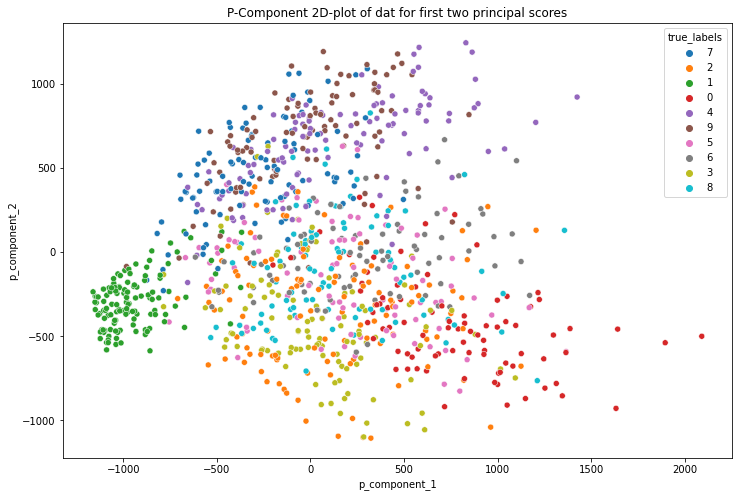

In [19]:
plt.figure(figsize=(12, 8))
plt.title("P-Component 2D-plot of dat for first two principal scores")
sns.scatterplot(data = pcs_df_filtered, x="p_component_1", y="p_component_2", hue="true_labels") #Principle component 2d plot

1 in green seems to be well seperated whereas the others are kind of mixed up and not well differentiated.

3. Which images have the maximum and minimum value of the first two principal components? Visualize them. (15 points)

Based on the previous graph, we can say for principal component 1 the minimum and maximum values are 1 and 0 respectively, whereas for principal component 2 the minimum and maximum values are 2 and 4 respectively.
Now I will visualize each of them below.

In [20]:
import matplotlib.pyplot as plt
import numpy as np

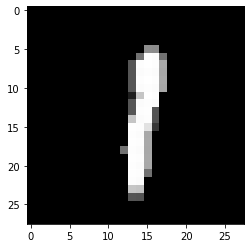

In [21]:
#minimum for p_component_1
im1 = dat[np.argmin(pcs[:, 0]), :]
im1 = im1.reshape((28, 28))
plt.imshow(im1, cmap='gray')

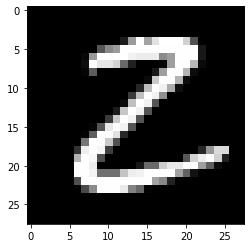

In [22]:
#minimum for p_component_2
im2 = dat[np.argmin(pcs[:, 1]), :]
im2 = im2.reshape((28, 28))
plt.imshow(im2, cmap='gray')

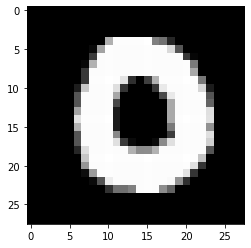

In [23]:
#maximum for p_component_1
im3 = dat[np.argmax(pcs[:, 0]), :]
im3 = im3.reshape((28, 28))
plt.imshow(im3, cmap='gray')

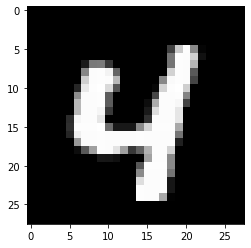

In [24]:
#maximum for p_component_2
im4 = dat[np.argmax(pcs[:, 1]), :]
im4 = im4.reshape((28, 28))
plt.imshow(im4, cmap='gray')

4. Run t-SNE on the dataset to generate a two-dimensional representation. It may take a while for your computer to generate the results. Visualize all data points as in question 2. (20 points)

In [25]:
from sklearn.manifold import TSNE #tsne module load

In [196]:
data_tSNE = TSNE(random_state=11).fit_transform(dat) #applying tsne

In [197]:
true_labels = pd.DataFrame(lab)
true_labels.columns = ["true_labels"]
true_labels = true_labels.applymap(str)
true_labels.dtypes

true_labels    object
dtype: object

In [198]:
tSNE_dict = {"t-dist_SNE_1" : data_tSNE[:,0], "t-dist_SNE_2" : data_tSNE[:,1]}
tSNE_df = pd.DataFrame(data=tSNE_dict) #making a dictionary using 1st 2 dcores and then making a df

In [199]:
tSNE_df_final = pd.concat([true_labels, tSNE_df], axis=1, join='inner')
tSNE_df_final.head() #tsne df for plot

,true_labels,t-dist_SNE_1,t-dist_SNE_2
0,7,5.994982,-25.734699
1,2,7.294010,25.969379
2,1,27.906893,5.500549
3,0,-15.417665,44.002949
4,4,-3.881349,-53.400253


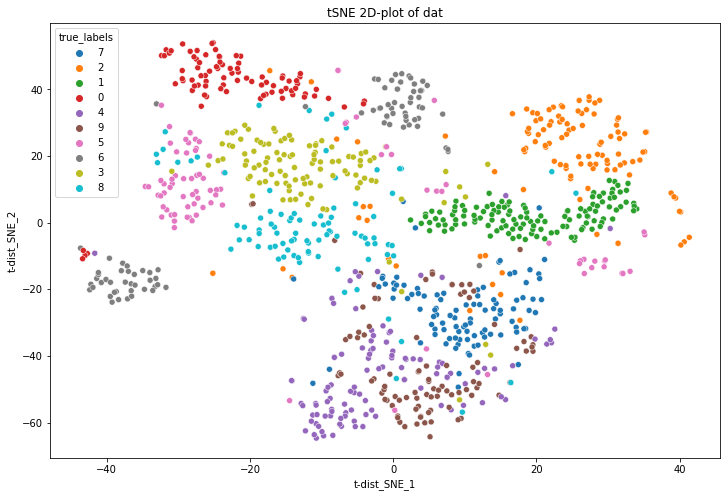

In [200]:
plt.figure(figsize=(12, 8))
plt.title("tSNE 2D-plot of dat")
sns.scatterplot(data = tSNE_df_final, x="t-dist_SNE_1", y="t-dist_SNE_2", hue="true_labels") #Tsne plotting using dat

5. Using the most informative prinicipal components, try the DBSCAN algorithm with Pearson correlation distance as the dissimilarity measure. Please tell us: 
- How you chose the number of components to use.
- Whether applying DBSCAN on the prinicpal components of the data performed better or worse than applying DBSCAN on the raw data, and why you think this is.  (20 points)



Principle component 1 and 2 plot does not making any sense from above to be used, so I use the scree plot of first 50 components to see a zoomed version and find the best value for components for the data.

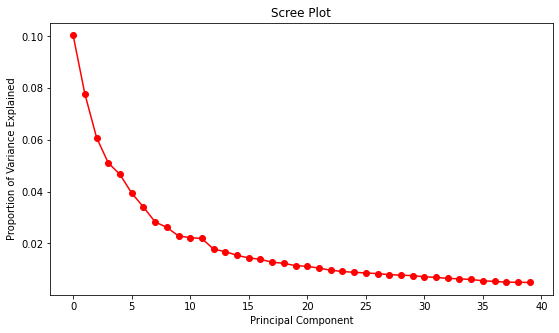

In [211]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.plot(pca_sklearn.explained_variance_ratio_[0:40], "ro-")
plt.show()

Based on the plot for 50 components, it seems the elbow of the plot kind of lies around 10 to 18.

Now for DBScan I need eps and minPts, to choose minPts according to the lecture demo, it is set to be dimensionality of the data plus one whereas to choose eps, I need to do a KNN distance plot to find where the elbow roughly starts. Since we are trying to do a dimension reduction I will choose the dimension as 11 since it is near the start of elbow according to the filtered Scree plot above for 50 components.

So to do KNN distance plot, 

In [1]:
from sklearn.metrics import pairwise_distances

In [201]:
distance_matrix = pairwise_distances(pcs[:,0:11], metric="correlation")
distance_matrix.shape #distance matrix for PCA data

(1000, 1000)

In [202]:
knn_dist_plot = np.sort(np.sort(distance_matrix, axis=0)[11,:]) #knn dist plt data for PCA

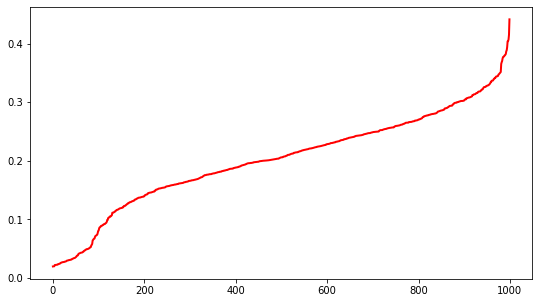

In [233]:
plt.figure(figsize=(9, 5))
plt.plot(knn_dist_plot, "r",linewidth = 2) #knn dist plot for PCA

Elbow looks to be around 0.16 to 0.2, so I will choose eps to be 0.162 because it kind of looks okay to me.

In [66]:
from sklearn.cluster import DBSCAN

In [208]:
dbScan_model = DBSCAN(eps = 0.162, min_samples = 12, metric = "correlation")
dbScan_model.fit(pcs[:,0:11]) #DBScan on PCA data

DBSCAN(algorithm='auto', eps=0.162, leaf_size=30, metric='correlation',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

In [209]:
np.unique(dbScan_model.labels_)#DBScan labels of PCA data

array([-1,  0,  1,  2,  3,  4,  5,  6])

Now I randomly apply DBScan on our given raw data selecting eps and min_samples randomly to compare with DBScan of pca values. I just tuned them manually to make it comparable with the PCA.

In [298]:
dbScan_model1 = DBSCAN(eps = 0.26, min_samples = 12, metric = "correlation") #DBScan model on raw data
dbScan_model1.fit(dat) #DBScan on raw data

DBSCAN(algorithm='auto', eps=0.26, leaf_size=30, metric='correlation',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

In [299]:
np.unique(dbScan_model1.labels_) #DBScan labels of raw data

array([-1,  0,  1,  2,  3,  4,  5,  6])

-1 is the noise in both cases.
I used the DBScan clusters to be visualized inside tSNE data score plot because it is much more easier to visualize.

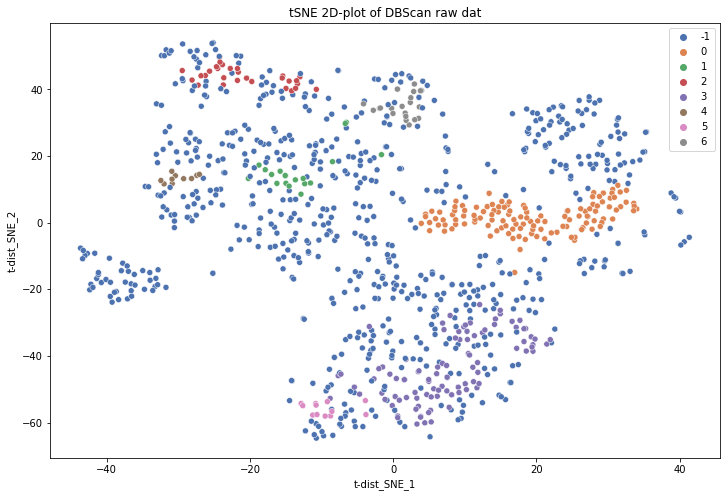

In [292]:
#visualizing the DBScan cluster for PCA data on the previous tSNE plotted scores
plt.figure(figsize=(12, 8))
plt.title("tSNE 2D-plot of DBScan raw dat")
sns.scatterplot(data = tSNE_df_final, x="t-dist_SNE_1", y="t-dist_SNE_2", hue=dbScan_model1.labels_, palette="deep")

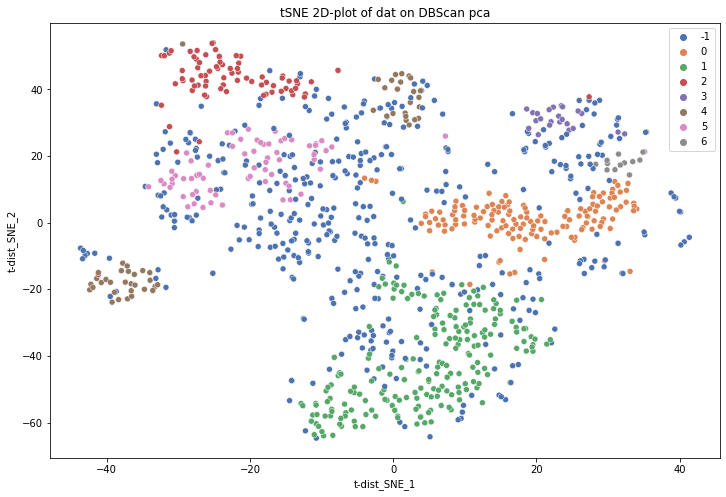

In [293]:
#visualizing the DBScan cluster for RAW data on the previous tSNE plotted scores
plt.figure(figsize=(12, 8))
plt.title("tSNE 2D-plot of dat on DBScan pca")
sns.scatterplot(data = tSNE_df_final, x="t-dist_SNE_1", y="t-dist_SNE_2", hue=dbScan_model.labels_, palette="deep")

Comparing the DBScan plot with the one above with true labels, I can say 2 and 4 performed pretty well in DBScan compared to that of the tSNE plot with true labels. Also 0 is well distinguished in both, also it is very hard to distinguish 7, 8, and 9. Also I see a lot of points for -1 which are noises in DBScan plot.

Now comparing the PCA DBScan plot with Raw DBScan plot, we can see the PCA model performed much better than the Raw DBScan model. All of the cluster points are much more distinguished and well separated compared to the raw data. So seeing this we can say that DBScan on PCA data worked way better than the one in Raw data.

**Reference:**

For the idea to visualize DBScan cluster inside tSNE data score plot, I came across this article, and using some knowledge from there I tried to apply on my own code, and I think it worked.
https://medium.com/@tarammullin/visualizing-dbscan-results-with-t-sne-plotly-e3742205c900